# Exercise 01: Data preprocessing using the Titanic dataset

### GRA 4160

The data is available on the Kaggle website (https://www.kaggle.com/c/titanic).
There is also a saved copy of the data in the data folder on itslearning.

I have copied the description of the data here:

 <p>  <p>

| Variable | 	Definition     | Key                        |
|----------|-----------------|----------------------------|
| survival | 	Survival       | 	0 = No, 1 = Yes           |
| pclass   | Ticket class    | 	1 = 1st, 2 = 2nd, 3 = 3rd |
| sex	     | Sex |                            |
| Age	     | Age in years |                            |
| sibsp	   | # of siblings / spouses aboard the Titanic |                            |
| parch	   | # of parents / children aboard the Titanic |                            |
| ticket   |	Ticket number |                            |
| fare	 | Passenger fare |                            |
| cabin	 | Cabin number | |
| embarked	| Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton |

<p>

Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Exercises

1. Load and inspect the dataset (use the train.csv file)
2. Check for missing values and impute any missing data as appropriate.
3. Check for outliers and handle them in a suitable way (e.g. look at the fare column).
4. Encode categorical variables as numerical data.
5. Compute the probability of surviving if a passenger is on 1, 2, or 3 class? What about male vs. female?

In [1]:
## Your solutions goes here

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Exercise 1
titanic = pd.read_csv('../data/titanic/train.csv',
                           index_col=[0])
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
# Exercise 2

# Check for missing values
print(titanic.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [6]:
# Impute missing values

titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic['Cabin'].fillna("Unknown", inplace=True)

In [7]:
# Check for missing values after imputation
print(titanic.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64


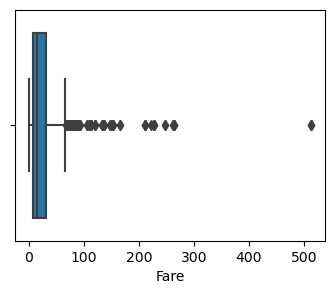

In [8]:
# Exercise 3

# Plot a boxplot to visualize the distribution of the Fare column
plt.figure(figsize=(4,3))
sns.boxplot(x=titanic['Fare'])
plt.show()

In [9]:
# Calculate the Interquartile Range (IQR)
Q1 = titanic['Fare'].quantile(0.25)
Q3 = titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1

In [10]:
# Identify outliers
outliers = (titanic['Fare'] < (Q1 - 1.5 * IQR)) | (titanic['Fare'] > (Q3 + 1.5 * IQR))

In [11]:
# Handle the outliers
titanic.loc[outliers, 'Fare'] = titanic['Fare'].median()

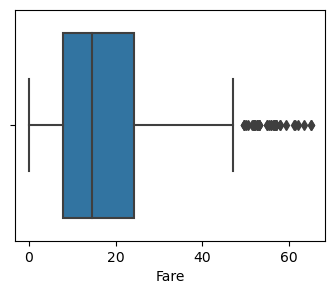

In [12]:
# Plot a boxplot to visualize the distribution of the Fare column after handling the outliers
plt.figure(figsize=(4,3))
sns.boxplot(x=titanic['Fare'])
plt.show()

In [13]:
# Exercise 4

# Encode the Sex column
titanic['Sex'] = titanic['Sex'].map({"male": 0, "female": 1})

# Encode the Embarked column
titanic['Embarked'] = titanic['Embarked'].map({"S": 0, "C": 1, "Q": 2})

titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,14.4542,C85,1
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,0


In [24]:
# Exercise 5

print(f'First class: {titanic[titanic["Pclass"] == 1]["Survived"].mean().round(3)}')
print(f'Second class: {titanic[titanic["Pclass"] == 2]["Survived"].mean().round(3)}')
print(f'Third class: {titanic[titanic["Pclass"] == 3]["Survived"].mean().round(3)}')

First class: 0.63
Second class: 0.473
Third class: 0.242


In [25]:
print(f'Female: {titanic[titanic["Sex"] == 1]["Survived"].mean().round(3)}')
print(f'Male: {titanic[titanic["Sex"] == 0]["Survived"].mean().round(3)}')

Female: 0.742
Male: 0.189


### 5
The 'pclass' variable in the dataset represents the ticket class, which can be seen as a proxy for socio-economic status (SES). It may affect survival rates because passengers in higher classes (1st class) might have had better access to lifeboats and preferential treatment during the Titanic's sinking, potentially leading to higher survival rates for those in higher classes.

### 6

Handling missing values and outliers is important in data preprocessing for machine learning because they can significantly impact the accuracy and reliability of predictive models. Missing values can lead to biased or incomplete analyses, while outliers can skew statistical measures and lead to incorrect conclusions.